## Connect to TPU


In [1]:
import keras
keras.__version__
from keras import backend as K
#K.tensorflow_backend._get_available_gpus()
import tensorflow as tf

from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()

for val in local_device_protos:
  print(val.device_type)

CPU
TPU_SYSTEM
TPU
TPU
TPU
TPU
TPU
TPU
TPU
TPU


2024-02-25 07:27:22.760134: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760253: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760358: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760447: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760525: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760732: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:22.760843: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras import backend as K

sess = tf.compat.v1.Session()
K.set_session(sess)


In [3]:
!pip install matplotlib seaborn plotly pandas missingno numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:

import sys
import os
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *

from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import *

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json

In [5]:
import pathlib
import tensorflow as tf

train_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Training')
test_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Testing')
img_height=512
img_width=512

In [6]:
train_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.


2024-02-25 07:27:41.150007: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150172: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150246: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150343: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150449: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150639: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:27:41.150784: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

In [7]:
test_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [8]:
val_ds  = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=64)


Found 1311 files belonging to 4 classes.


## Visualize the data distribution

In [9]:
ROOT_DIR = r"/kaggle/input/brain-tumor-mri-dataset"
TRAIN_DIR = os.path.join(ROOT_DIR, 'Training')
TEST_DIR = os.path.join(ROOT_DIR, 'Testing')
assert os.path.isdir(ROOT_DIR) and os.path.isdir(TRAIN_DIR) and os.path.isdir(TEST_DIR)
TUMOR_CLASS = ['meningioma', 'glioma', 'pituitary', 'notumor']
IMAGE_DATA_PATHS = [os.path.join(TRAIN_DIR, tumor_class) for tumor_class in TUMOR_CLASS]
TEST_DATA_PATHS = [os.path.join(TEST_DIR, tumor_class) for tumor_class in TUMOR_CLASS]

In [10]:
TEST_DATA_PATHS

['/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor']

In [11]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in TEST_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    306
glioma        300
pituitary     300
notumor       405
dtype: int64

In [12]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in IMAGE_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    1339
glioma        1321
pituitary     1457
notumor       1595
dtype: int64

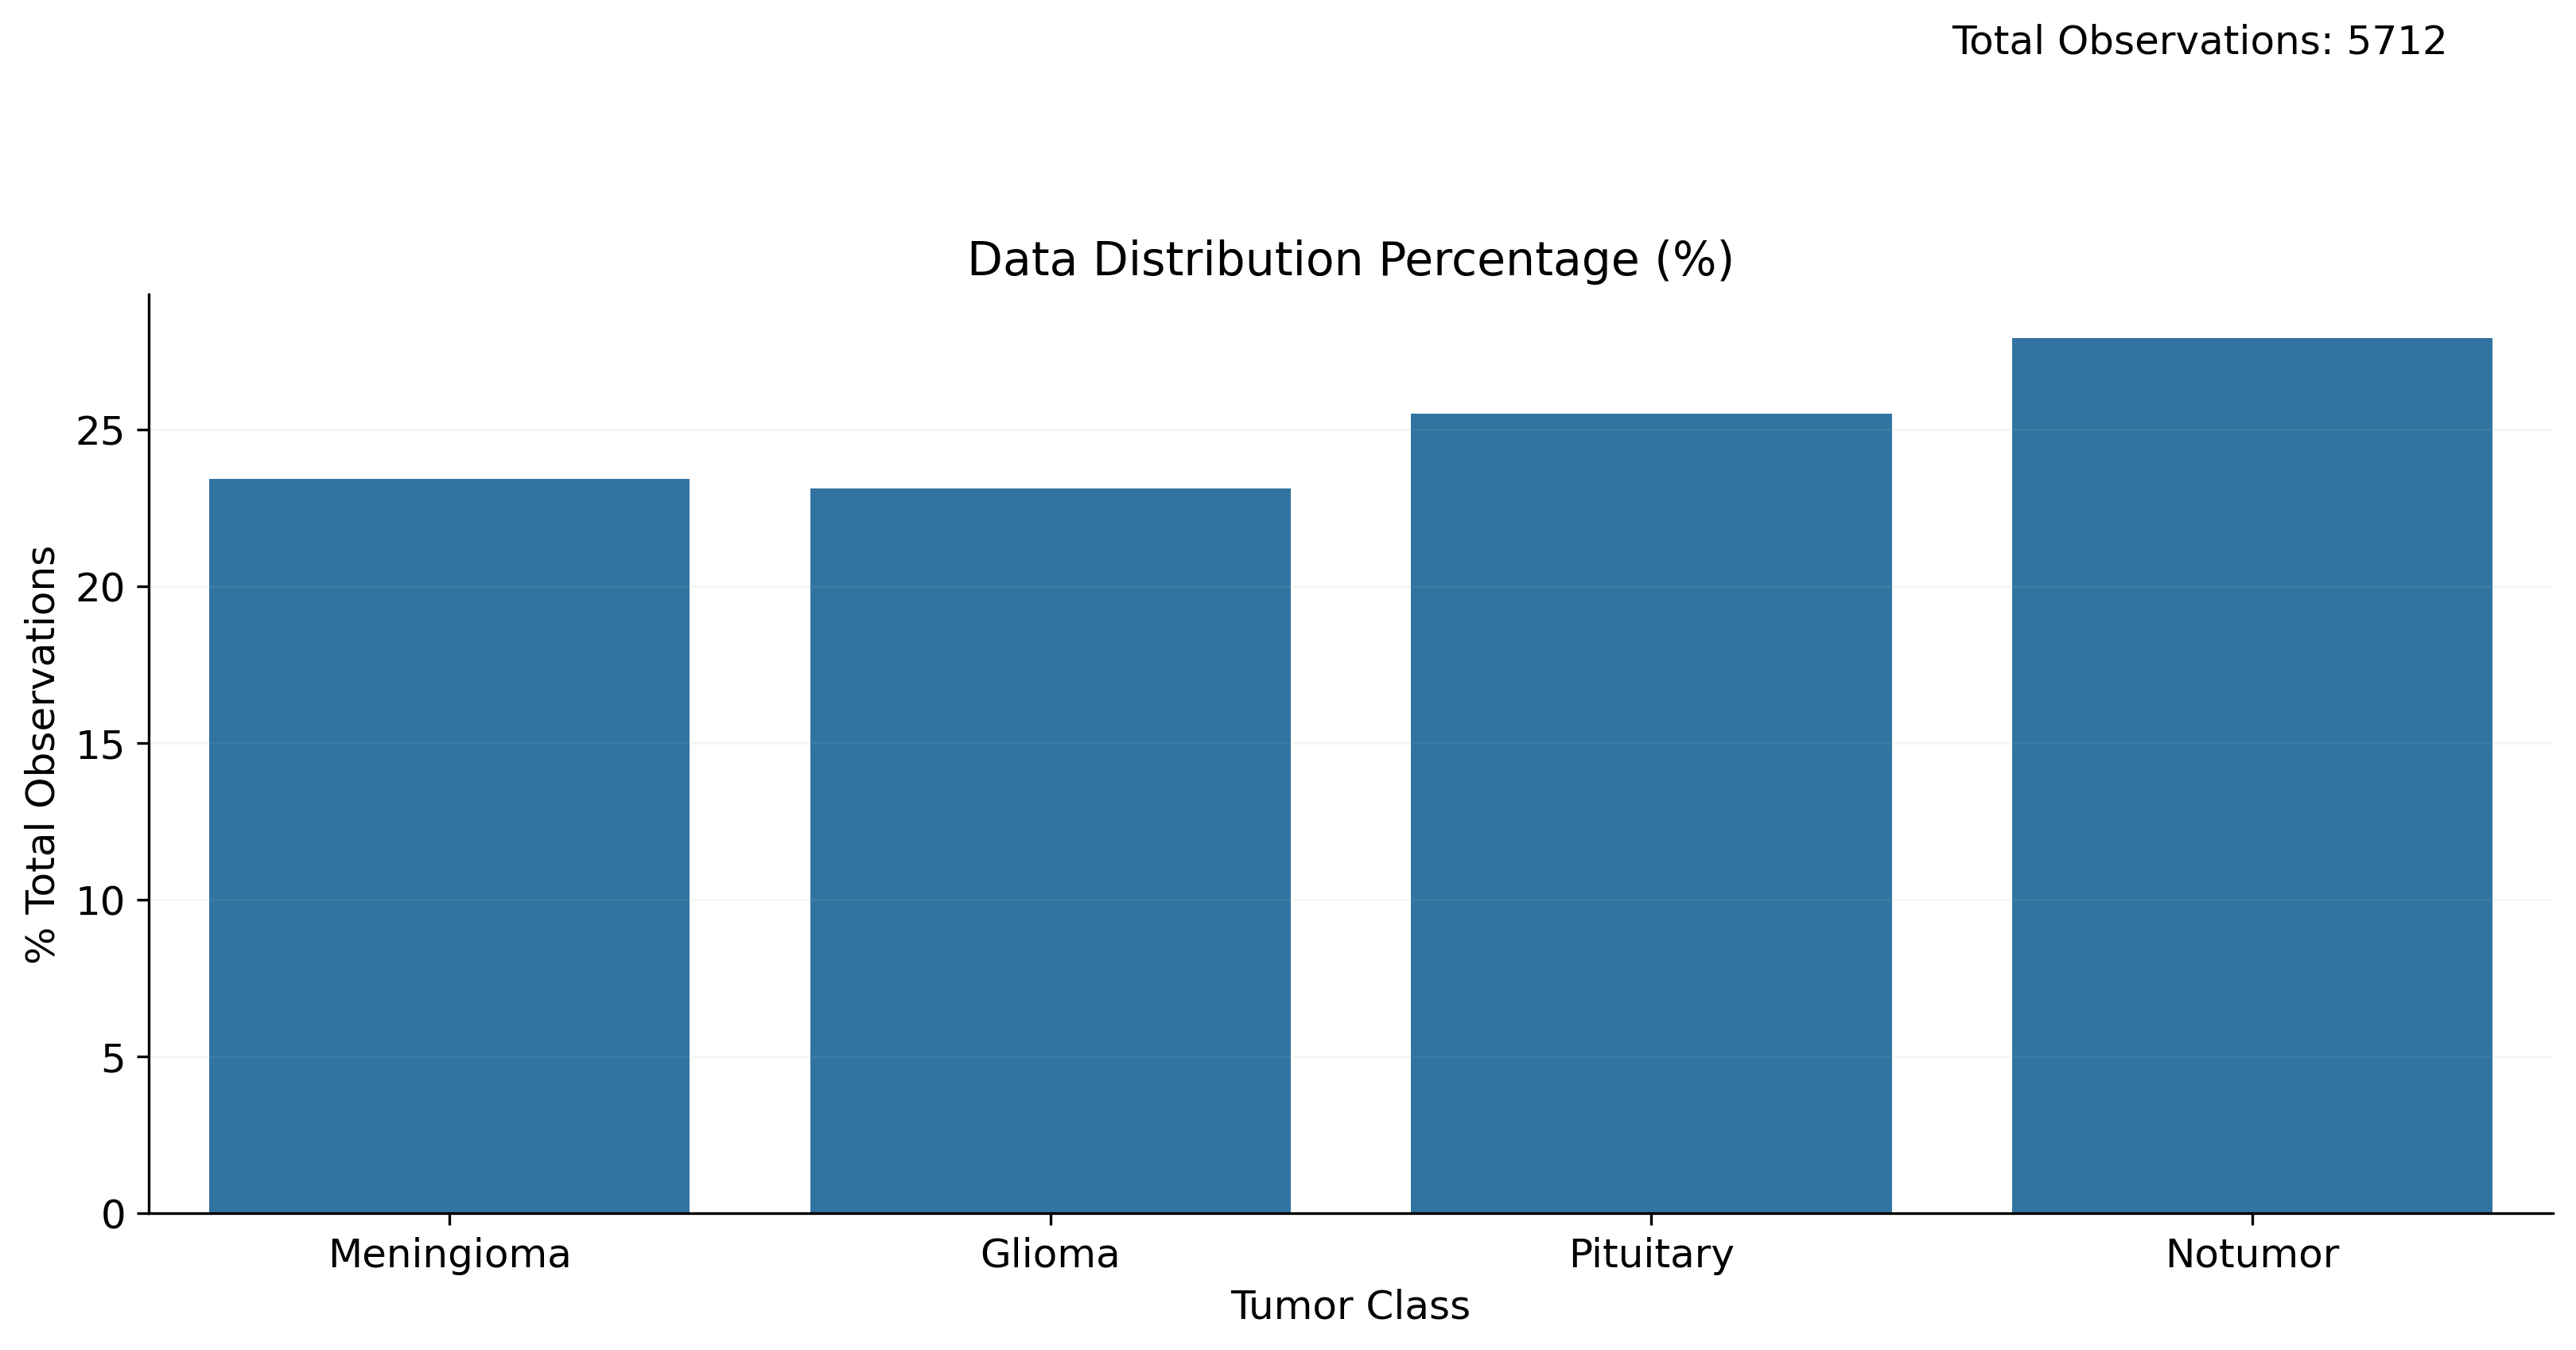

In [13]:
fig, axis = plt.subplots(figsize = (13, 5))
axis.grid(True, alpha = 0.1)
axis.set_title("Data Distribution Percentage (%)", fontsize = 14)
sns.barplot(x = ['\n'.join(curr_index.strip().split('_')).title() for curr_index in data_distribution_count.index],
            y = 100 * (data_distribution_count / data_distribution_count.sum()), ax = axis)
axis.set_xlabel("Tumor Class", fontsize = 12)
axis.set_ylabel("% Total Observations", fontsize = 12)
axis.tick_params(which = 'major', labelsize = 12)
axis.text(2.5, 37, f'Total Observations: {data_distribution_count.sum()}', fontdict = dict(size = 12))
sns.despine()

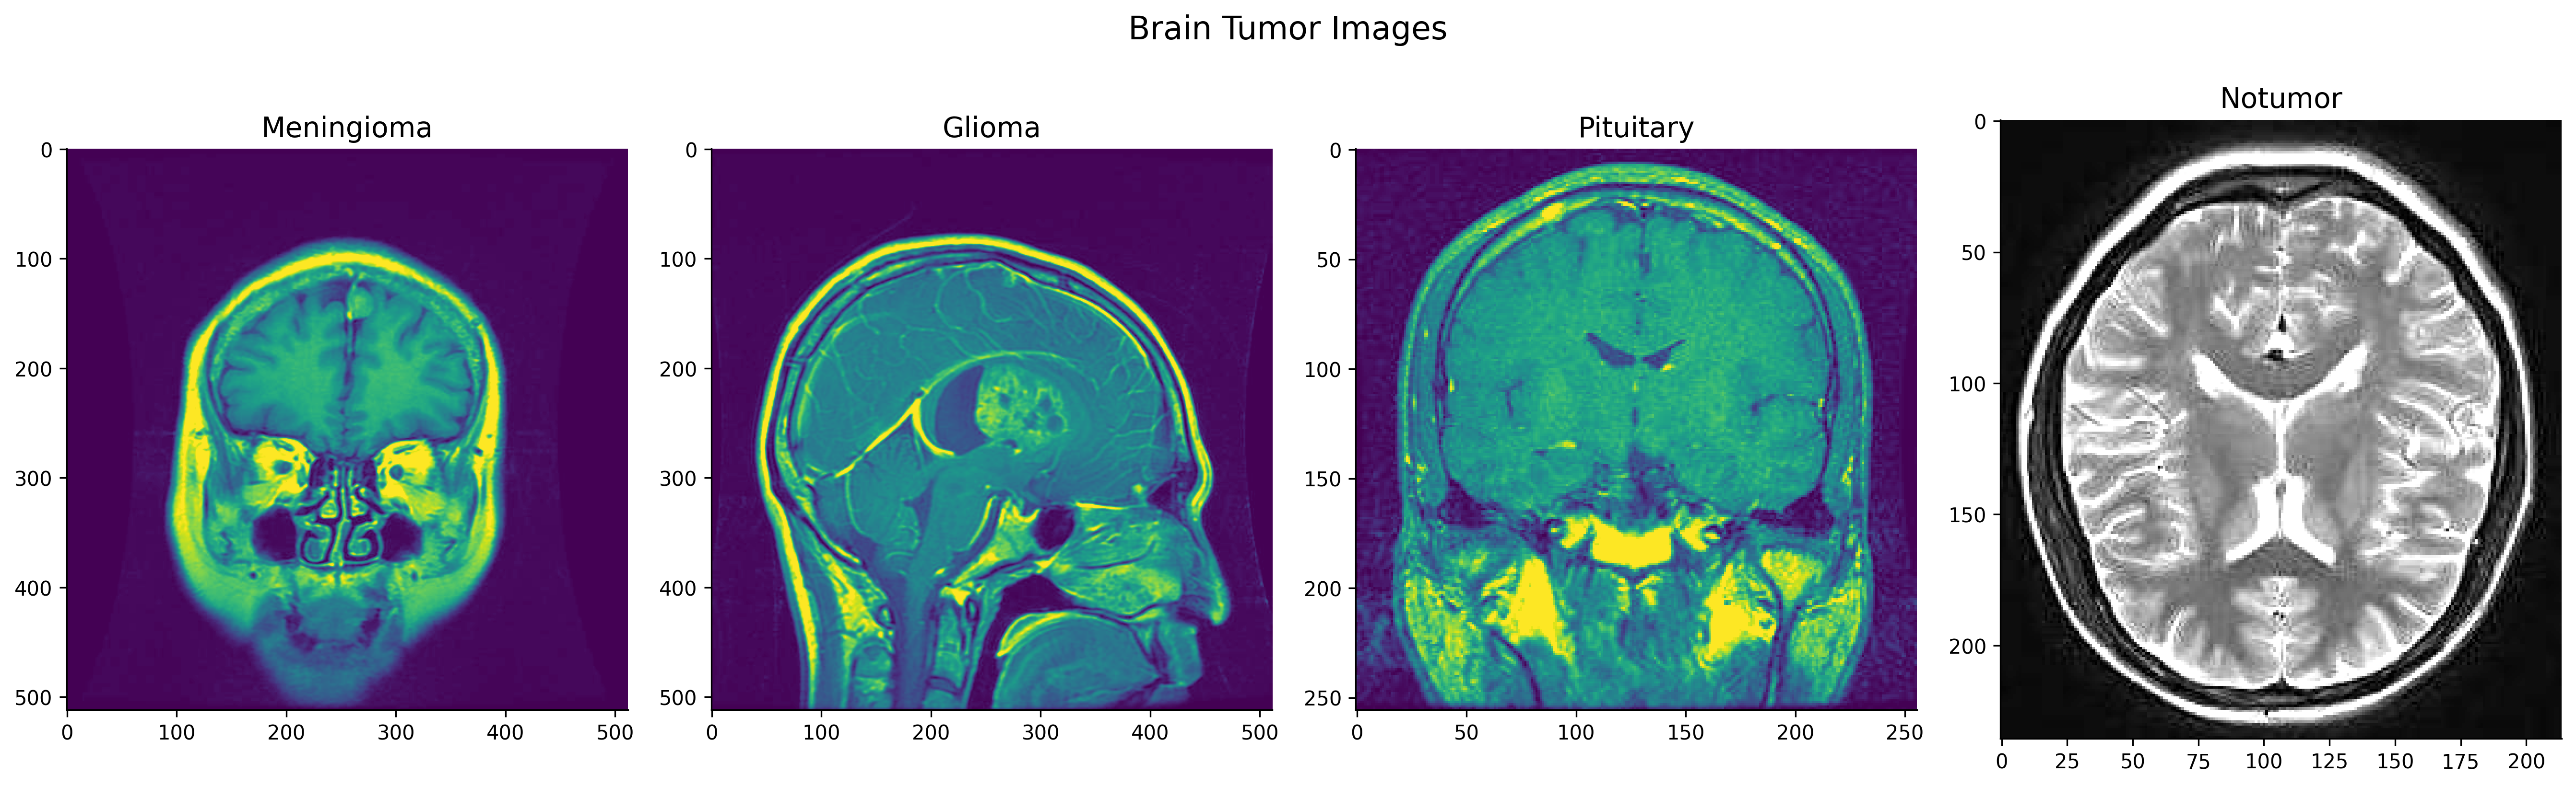

In [14]:
BRIGHTNESS_FACTOR = 1.7
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 5))
axes = axes.flatten()
fig.suptitle("Brain Tumor Images", fontsize = 16, fontdict = dict(weight = 'bold'), y = 1.04)
for curr_title, filename, curr_axis in zip(TUMOR_CLASS, IMAGE_DATA_PATHS, axes[:4]):
    curr_image = Image.open(os.path.join(filename, os.listdir(filename)[2]))
    img_enhancer = ImageEnhance.Brightness(curr_image)
    curr_axis.imshow(img_enhancer.enhance(BRIGHTNESS_FACTOR))
    curr_axis.set_title(" ".join(curr_title.split('_')).title(), fontsize = 14)

fig.tight_layout()
sns.despine()

## Image Augmentation

In [15]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### ResNet101V2

In [18]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

# Detect and initialize the TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Instantiating the model within the strategy scope creates the model on the TPU
with strategy.scope():
    base_model = ResNet101V2(include_top=False, weights='imagenet', input_shape=(512, 512, 3))

    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions = Dense(4, activation='softmax')(x)  # Ensure output layer has 4 units and softmax activation

    # Combine base model and custom head into a new model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU

I0000 00:00:1708846082.530277      13 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [20]:
# Model training inside the TPU strategy scope
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=100
)

Epoch 1/100


2024-02-25 07:28:03.156665: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.181175: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.204564: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.227983: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.250817: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.274394: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:03.297306: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

 1/72 ━━━━━━━━━━━━━━━━━━━━ 30:22 26s/step - accuracy: 1.5000 - loss: 1989.0409

2024-02-25 07:28:28.495956: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.496958: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.497123: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.497727: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.498007: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.498173: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:28.498289: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

 3/72 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 1.7917 - loss: 2066.0725

2024-02-25 07:28:28.740049: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


19/72 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 2.0197 - loss: 1738.7703

2024-02-25 07:28:30.735570: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


31/72 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 2.0390 - loss: 1612.1980

2024-02-25 07:28:32.020145: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:28:32.231854: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


61/72 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 2.1176 - loss: nan

2024-02-25 07:28:48.708850: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


72/72 ━━━━━━━━━━━━━━━━━━━━ 72s 657ms/step - accuracy: 2.1167 - loss: nan - val_accuracy: 0.2797 - val_loss: 81.1544
Epoch 2/100
17/72 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 2.9713 - loss: nan

2024-02-25 07:29:17.516288: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 2.9402 - loss: nan

2024-02-25 07:29:25.111476: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-02-25 07:29:25.111789: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 2.9047 - loss: nan - val_accuracy: 0.4825 - val_loss: 1.1575
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 3.0227 - loss: nan - val_accuracy: 0.3776 - val_loss: 1.2394
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 2.8585 - loss: nan - val_accuracy: 0.3566 - val_loss: 1.2536
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 2.6067 - loss: nan - val_accuracy: 0.2028 - val_loss: 1.3748
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 2.4063 - loss: nan - val_accuracy: 0.3007 - val_loss: 1.3677
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 2.5540 - loss: nan - val_accuracy: 0.2937 - val_loss: 1.3716
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 2.3919 - loss: nan - val_accuracy: 0.2867 - val_loss: 1.3711
Epoch 9/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 2.3238 - loss: nan - val_accuracy: 0.3077 - val_loss: 1.2

In [21]:
model.save('ResNet101V2_TPU.keras')  

In [22]:
train_score = model.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model.evaluate(test_ds , steps = 16 , verbose = 1)
test_score = model.evaluate(val_ds , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 949ms/step - accuracy: 2.7079 - loss: nan
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 2.1861 - loss: 10.0259
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 2.3481 - loss: 10.1387
Train Loss:  1.3959778547286987
Train Accuracy:  0.2016129046678543
--------------------
Validation Loss:  1.3902580738067627
Validation Accuracy:  0.234375
--------------------
Test Loss:  1.3790379762649536
Test Accuracy:  0.3359375


In [23]:
with open('model_scores.txt', 'w') as file:
    file.write("Train Loss: {}\n".format(train_score[0]))
    file.write("Train Accuracy: {}\n".format(train_score[1]))
    file.write('-' * 20 + '\n')
    file.write("Validation Loss: {}\n".format(valid_score[0]))
    file.write("Validation Accuracy: {}\n".format(valid_score[1]))
    file.write('-' * 20 + '\n')
    file.write("Test Loss: {}\n".format(test_score[0]))
    file.write("Test Accuracy: {}\n".format(test_score[1]))

print("Scores saved successfully.")

Scores saved successfully.


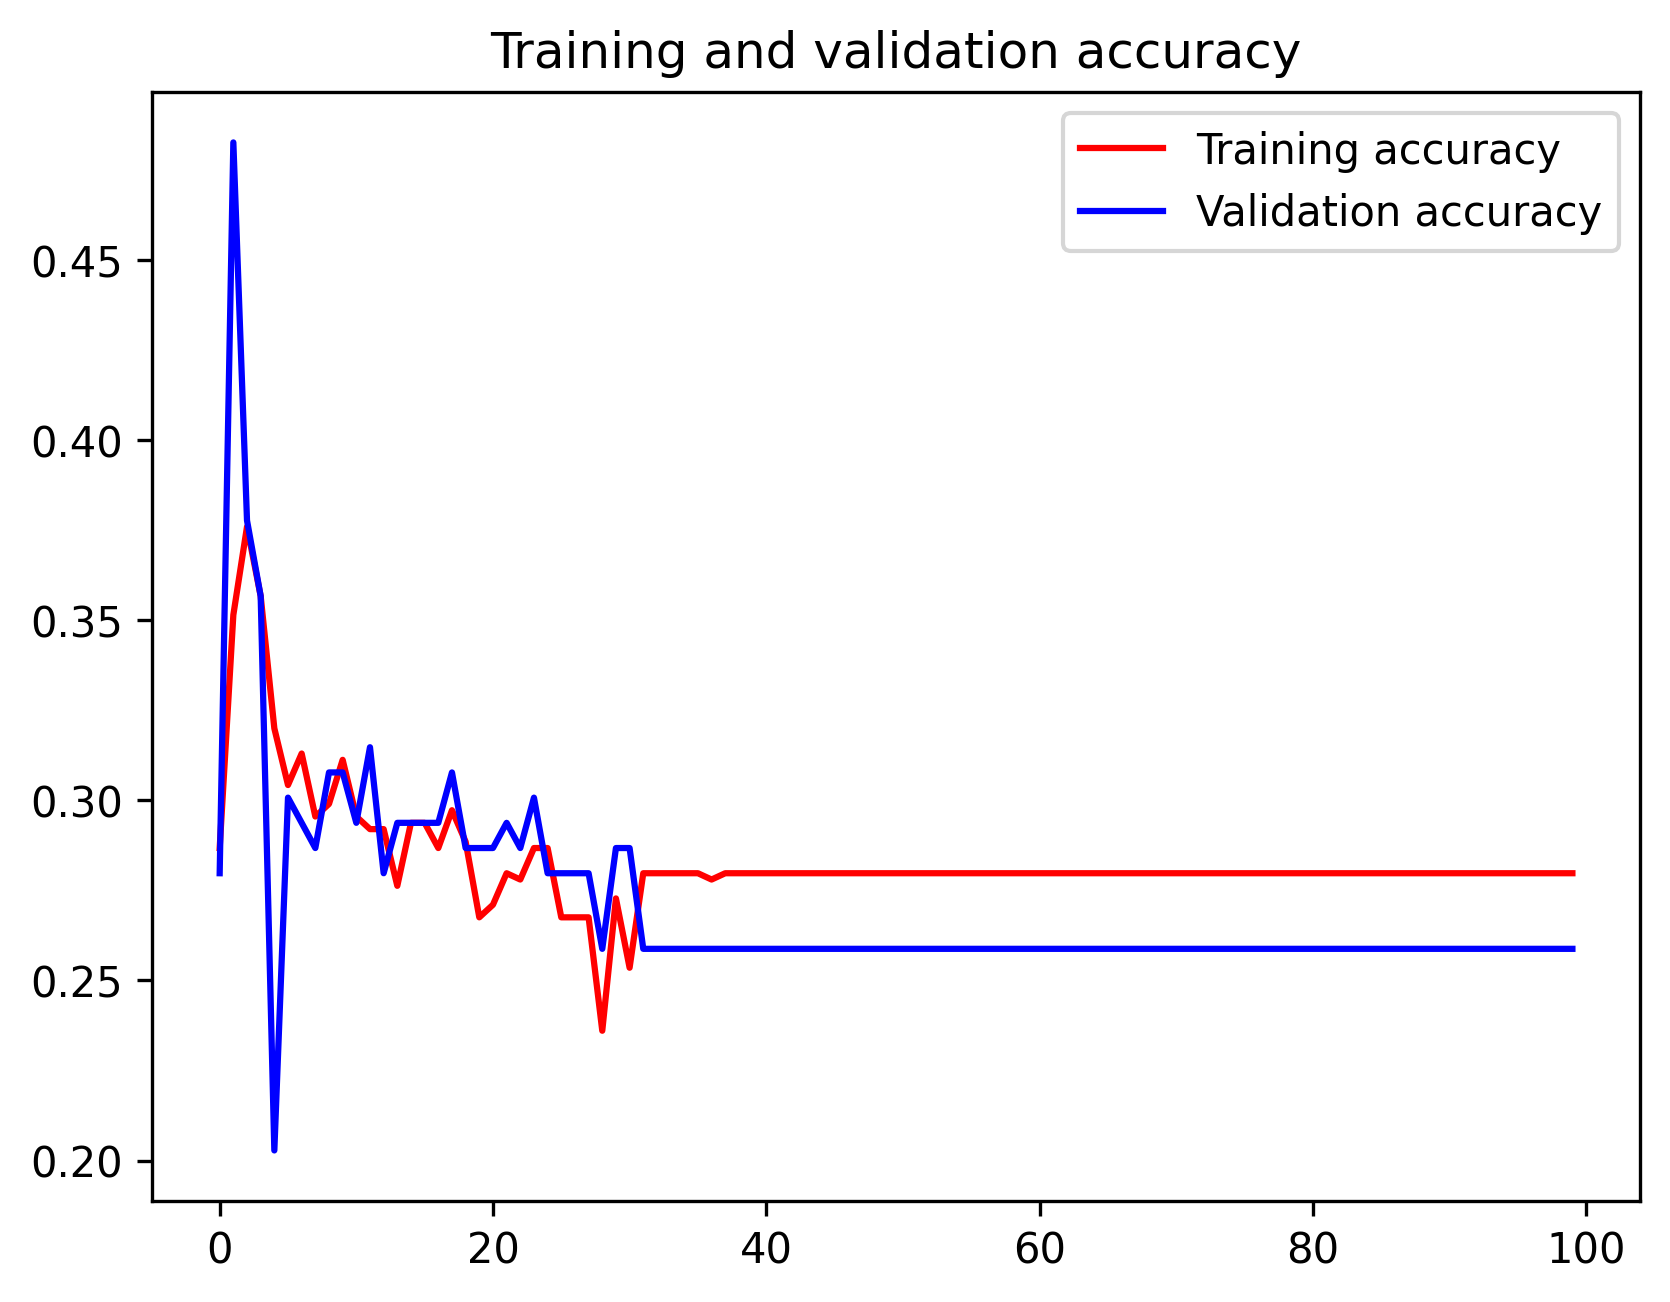

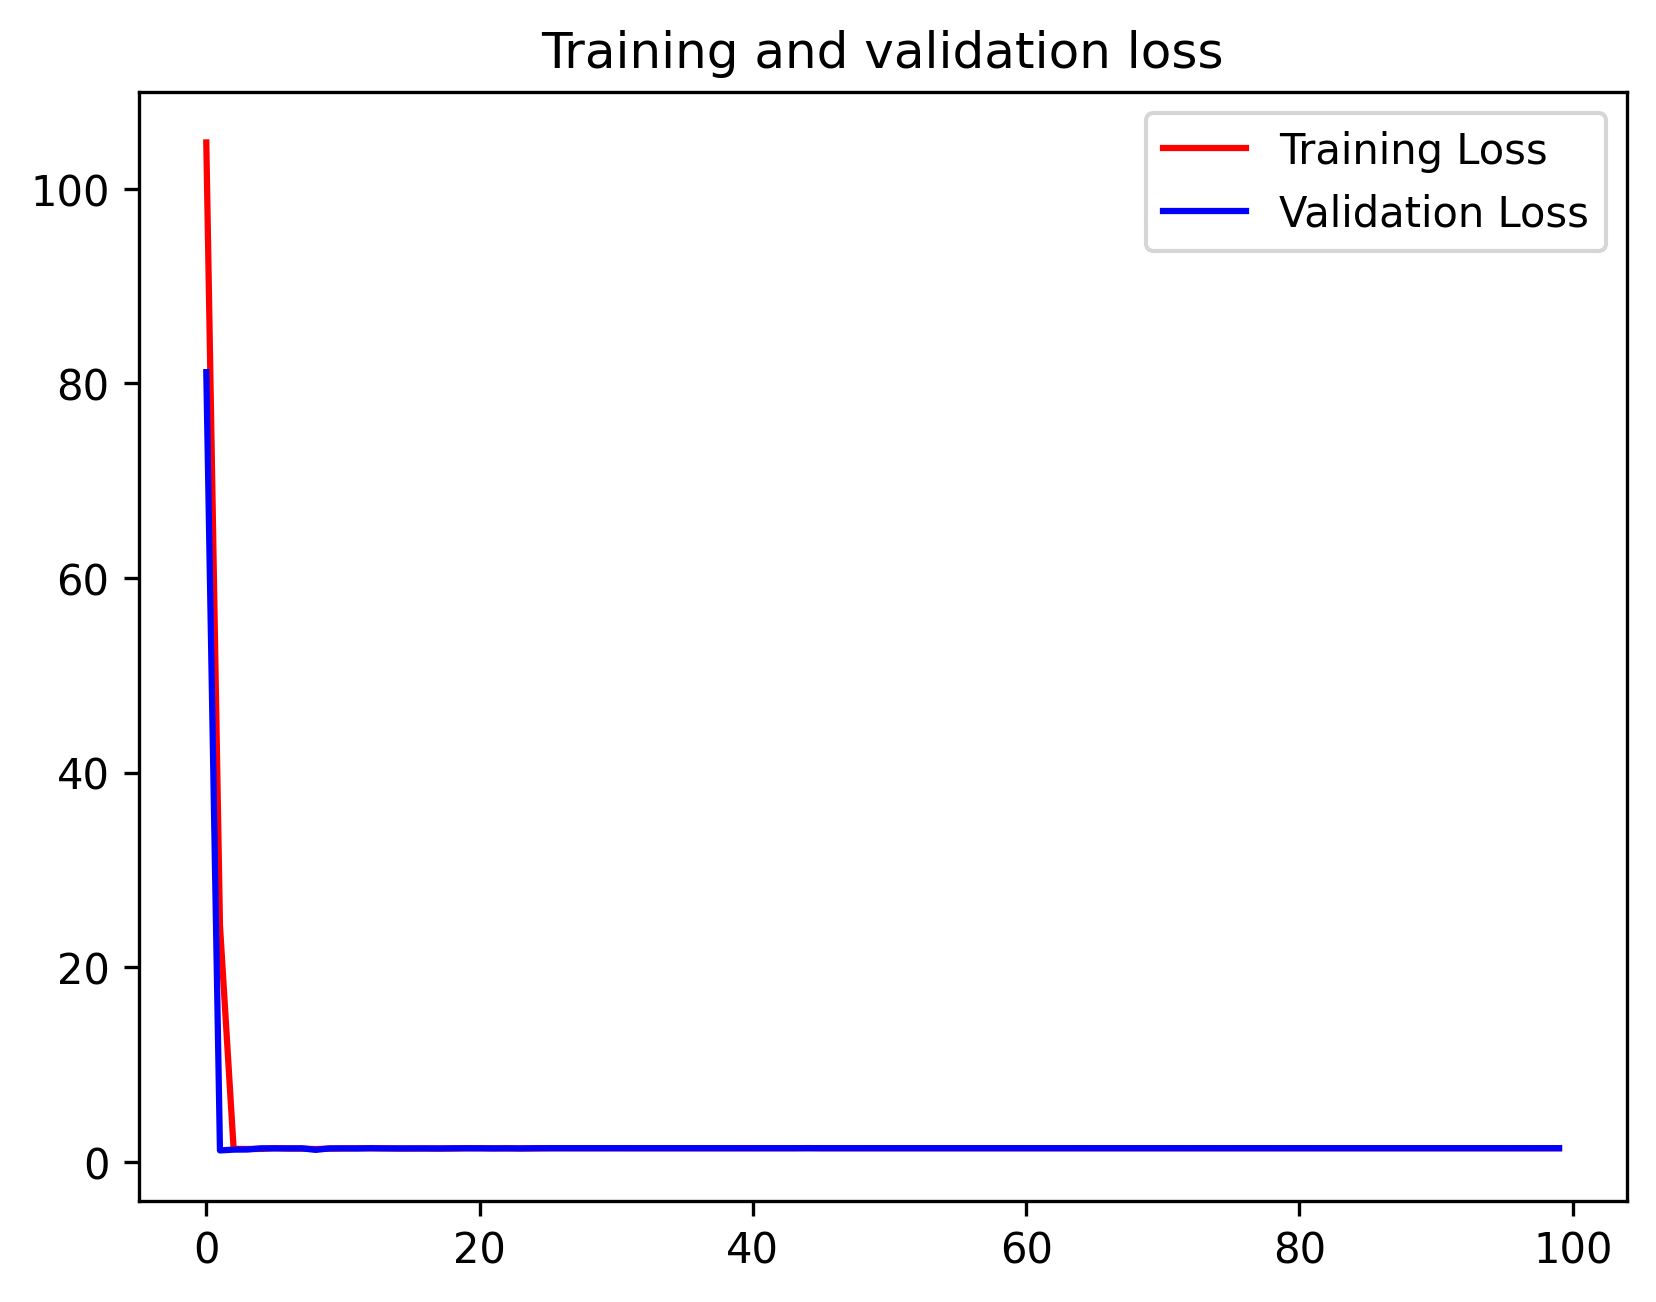

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Training and validation accuracy.png')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Training and validation loss.png')
plt.show()

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │       0 │ -                    │
│ (InputLayer)        │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_pad           │ (None, 518, 518,  │       0 │ input_layer[0][0]    │
│ (ZeroPadding2D)     │ 3)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv1_conv (Conv2D) │ (None, 256, 256,  │   9,472 │ conv1_pad[0][0]      │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pad           │ (None, 258, 258,  │       0 │ conv1_conv[0][0]     │
│ (ZeroPadding2D)     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ pool1_pool          │ (None, 128, 128,  │       0 │ pool1_pad[0][0]      │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_preac… │ (None, 128, 128,  │     256 │ pool1_pool[0][0]     │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_preac… │ (None, 128, 128,  │       0 │ conv2_block1_preact… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_conv │ (None, 128, 128,  │   4,096 │ conv2_block1_preact… │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_bn   │ (None, 128, 128,  │     256 │ conv2_block1_1_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_1_relu │ (None, 128, 128,  │       0 │ conv2_block1_1_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_pad  │ (None, 130, 130,  │       0 │ conv2_block1_1_relu… │
│ (ZeroPadding2D)     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_conv │ (None, 128, 128,  │  36,864 │ conv2_block1_2_pad[… │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_bn   │ (None, 128, 128,  │     256 │ conv2_block1_2_conv… │
│ (BatchNormalizatio… │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_2_relu │ (None, 128, 128,  │       0 │ conv2_block1_2_bn[0… │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_0_conv │ (None, 128, 128,  │  16,640 │ conv2_block1_preact… │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_3_conv │ (None, 128, 128,  │  16,640 │ conv2_block1_2_relu… │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2_block1_out    │ (None, 128, 128,  │       0 │ conv2_block1_0_conv

 Total params: 45,779,982 (174.64 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 42,626,560 (162.61 MB)

 Optimizer params: 2,102,282 (8.02 MB)